# Machine Learning Assignment 4 'SXC190052'

In [70]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as Sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neural_network import MLPClassifier

# EDA Dataset 1

In [2]:
# Importing the dataset
df1 = pd.read_csv('sgemm_product.csv')

In [3]:
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [3]:
df1["avg_run"] = df1.iloc[:,14:].mean(axis=1)
df1["log_avg_run"] = np.log(df1.avg_run) 
df1.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis = 1, inplace = True)

In [7]:
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run,log_avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,4.756775
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,4.365707
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,4.389064
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,4.461733
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,4.776283


In [8]:
df1.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run,log_avg_run
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.571953,4.623068
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,368.750161,1.128530
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.317500,2.589079
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.667500,3.705429
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.790000,4.245491
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.387500,5.431044
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3341.507500,8.114177


In [4]:
df1.drop(['avg_run'], axis = 1, inplace = True)

In [5]:
df1.log_avg_run.median()

4.245490733029061

In [6]:
true_false = df1.log_avg_run > 4.245490
values = true_false.value_counts()
print(values)

True     120802
False    120798
Name: log_avg_run, dtype: int64


In [7]:
Y = df1['log_avg_run'].apply(lambda x : 0 if x <= 4.245490 else 1)
Y.value_counts()

1    120802
0    120798
Name: log_avg_run, dtype: int64

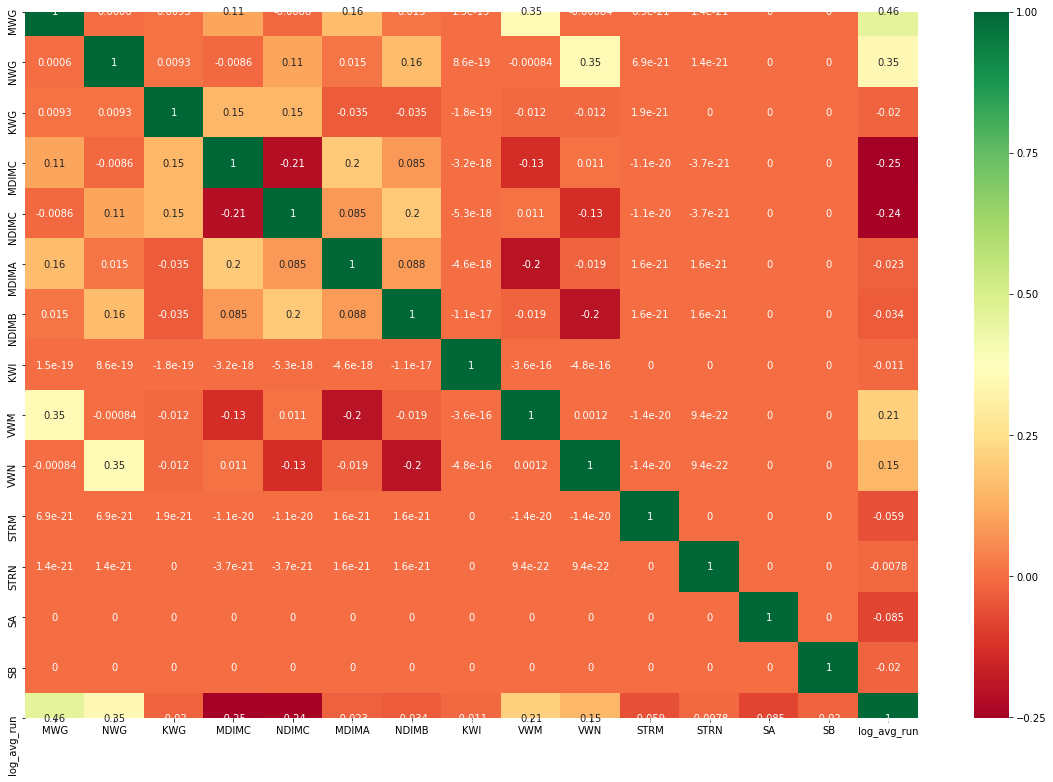

In [13]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,13))
g=Sb.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
#Checking for missing values
df1.isnull().sum()

MWG            0
NWG            0
KWG            0
MDIMC          0
NDIMC          0
MDIMA          0
NDIMB          0
KWI            0
VWM            0
VWN            0
STRM           0
STRN           0
SA             0
SB             0
log_avg_run    0
dtype: int64

In [8]:
X1 = df1.iloc[:,1:14]
Y1 = Y

In [9]:
# scaling for SVM
X_sc = X1.copy()
std_sc = StandardScaler()
X_sc = std_sc.fit_transform(X_sc)

# EDA for Dataset 2

In [29]:
df2 = pd.read_csv('adult.csv')

In [71]:
df2.head()

,Age,Work class,fnlwgt,Education,Edu-num,Marital status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [72]:
df2.describe()

,Age,fnlwgt,Edu-num,capital-gain,capital-loss,hours-per-week,Salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [30]:
df2['Salary'].value_counts()

0    24720
1     7841
Name: Salary, dtype: int64

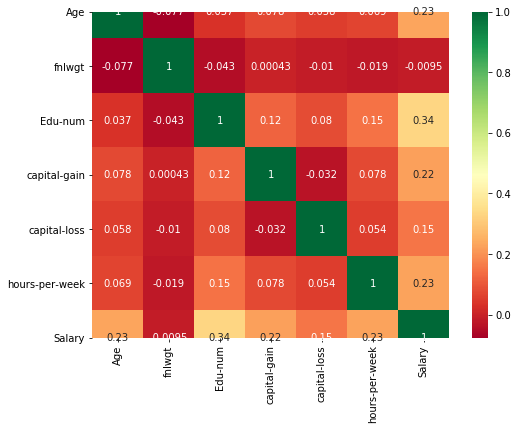

In [74]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,6))
g=Sb.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
X_adt = df2.iloc[:,0:14]
Y_adt = df2['Salary']

In [76]:
#Checking for missing values
df2.isnull().sum()

Age               0
Work class        0
fnlwgt            0
Education         0
Edu-num           0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [32]:
# Finding categorical data columns
obj_df = df2.select_dtypes(include=['object']).copy()
obj_df.head()

,Work class,Education,Marital status,Occupation,Relationship,Race,Sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [33]:
obj_df[obj_df.isnull().any(axis=1)]

,Work class,Education,Marital status,Occupation,Relationship,Race,Sex,native-country


In [34]:
# Encoding the categorical columns
obj_df["Work class"] = obj_df["Work class"].astype('category')
obj_df["WorkClass_cat"] = obj_df["Work class"].cat.codes
obj_df["Education"] = obj_df["Education"].astype('category')
obj_df["Education_cat"] = obj_df["Education"].cat.codes
obj_df["Marital status"] = obj_df["Marital status"].astype('category')
obj_df["MaritalStatus_cat"] = obj_df["Marital status"].cat.codes
obj_df["Occupation"] = obj_df["Occupation"].astype('category')
obj_df["Occupation_cat"] = obj_df["Occupation"].cat.codes
obj_df["Relationship"] = obj_df["Relationship"].astype('category')
obj_df["Relationship_cat"] = obj_df["Relationship"].cat.codes
obj_df["Race"] = obj_df["Race"].astype('category')
obj_df["Race_cat"] = obj_df["Race"].cat.codes
obj_df["Sex"] = obj_df["Sex"].astype('category')
obj_df["Sex_cat"] = obj_df["Sex"].cat.codes
obj_df["native-country"] = obj_df["native-country"].astype('category')
obj_df["NativeCountry_cat"] = obj_df["native-country"].cat.codes

In [35]:
#Adding the new encoded columns to dataset
df2['WorkClass_cat'] = obj_df['WorkClass_cat']
df2['Education_cat'] = obj_df['Education_cat']
df2['MaritalStatus_cat'] = obj_df['MaritalStatus_cat']
df2['Occupation_cat'] = obj_df['Occupation_cat']
df2['Relationship_cat'] = obj_df['Relationship_cat']
df2['Race_cat'] = obj_df['Race_cat']
df2['Sex_cat'] = obj_df['Sex_cat']
df2['NativeCountry_cat'] = obj_df['NativeCountry_cat']
df2.drop(['Work class','Education','Marital status','Occupation','Relationship','Race','Sex','native-country'], axis = 1, inplace = True)

In [36]:
df2.head()
lst = ['Age','fnlwgt','Edu-num','capital-gain','capital-loss','hours-per-week','WorkClass_cat','Education_cat','MaritalStatus_cat','Occupation_cat','Relationship_cat','Race_cat','Sex_cat','NativeCountry_cat','Salary']
A_df = df2[lst]
A_df.head()

,Age,fnlwgt,Edu-num,capital-gain,capital-loss,hours-per-week,WorkClass_cat,Education_cat,MaritalStatus_cat,Occupation_cat,Relationship_cat,Race_cat,Sex_cat,NativeCountry_cat,Salary
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0


In [38]:
X_adt = A_df.iloc[:,0:14]
Y_adt = A_df['Salary']
X_adt.head()

,Age,fnlwgt,Edu-num,capital-gain,capital-loss,hours-per-week,WorkClass_cat,Education_cat,MaritalStatus_cat,Occupation_cat,Relationship_cat,Race_cat,Sex_cat,NativeCountry_cat
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5


In [39]:
X_sc_adt = X_adt.copy()
std_sc = StandardScaler()
X = std_sc.fit_transform(X_sc_adt)

# K Means Algorithm Dataset 1

In [11]:
# Using elblow method to find optimal number of clusters
from sklearn.cluster import KMeans
w = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_sc)
    w.append(kmeans.inertia_)

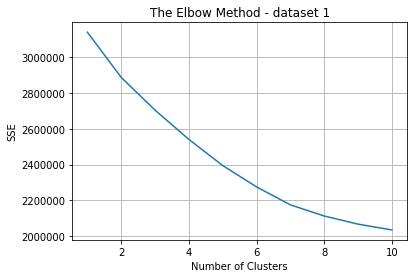

In [168]:
plt.plot(range(1,11),w)
plt.grid()
plt.title("The Elbow Method - dataset 1")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
# Applying k-means to dataset 1
kmeans = KMeans(n_clusters= 7, 
                init = "k-means++" , 
                max_iter= 500 , 
                n_init= 10 , 
                random_state= 0)

y_kmeans_1 = kmeans.fit_predict(X_sc)

# PCA

In [25]:
# Implementing PCA for dataset 1 to find maximum variance 
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
X1_PCA = pca.fit_transform(X_sc)
var_ex = pca.explained_variance_ratio_

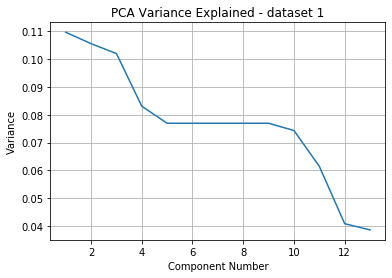

In [17]:
plt.plot(range(1,14),var_ex)
plt.title("PCA Variance Explained - dataset 1")
plt.xlabel("Component Number")
plt.ylabel("Variance")
plt.grid()
plt.show()

In [182]:
pca_1 = PCA(n_components = 10)
X1_final_PCA = pca_1.fit_transform(X_sc)

In [179]:
### Finding the number of clusters 
w_pca = []
for i in range (1,15):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X1_final_PCA)
    w_pca.append(kmeans.inertia_)

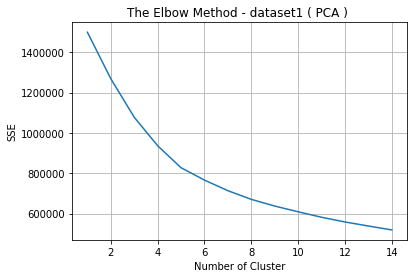

In [180]:
plt.plot(range(1,15), w_pca)
plt.title("The Elbow Method - dataset1 ( PCA ) ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [86]:
# Applying k-means to dataset 1
kmeans_final_pca = KMeans(n_clusters= 5, 
                init = "k-means++" , 
                max_iter= 500 , 
                n_init= 10 , 
                random_state= 0)

y_kmeans_1 = kmeans_final_pca.fit_predict(X1_final_PCA)

# Expectation Maximization

In [11]:
from sklearn.mixture import GaussianMixture 

In [14]:
bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X_sc)
        bic_cv.append(EM_Model.bic(X_sc))
    bic.append(bic_cv)

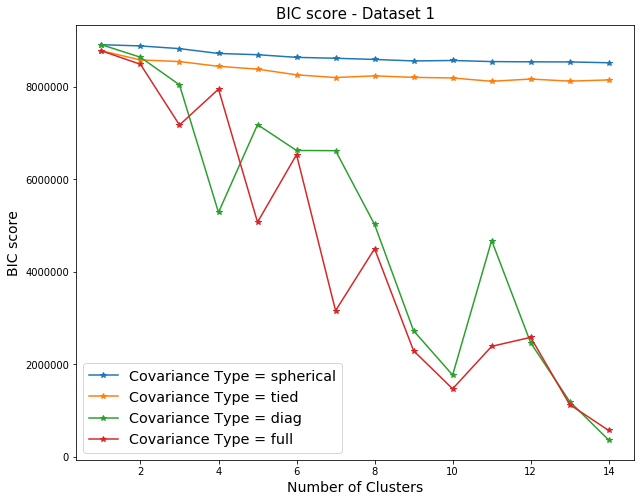

In [23]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with PCA

In [26]:
# Finding the number of clusters using BIC scores after implementing PCA
n_clusters=np.arange(2, 10)
sils1_PCA=[]
bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X1_PCA)
        bic_cv.append(EM_Model.bic(X1_PCA))
    bic.append(bic_cv)

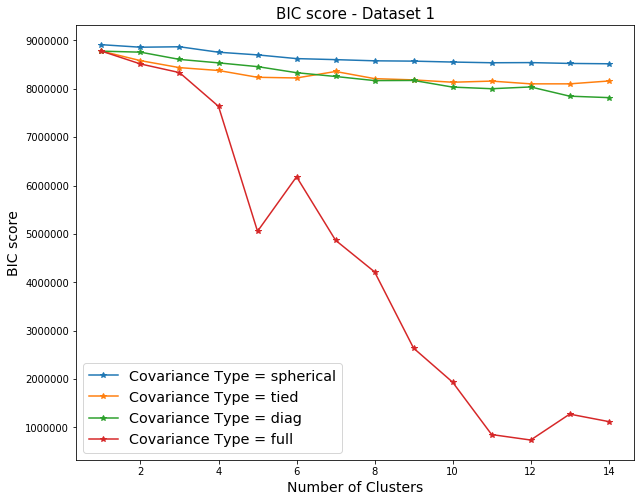

In [28]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with ICA

In [59]:
# Finding the number of clusters using BIC scores after implementing ICA
n_clusters=np.arange(2, 10)
sils1_PCA=[]
bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X1_ica)
        bic_cv.append(EM_Model.bic(X1_ica))
    bic.append(bic_cv)

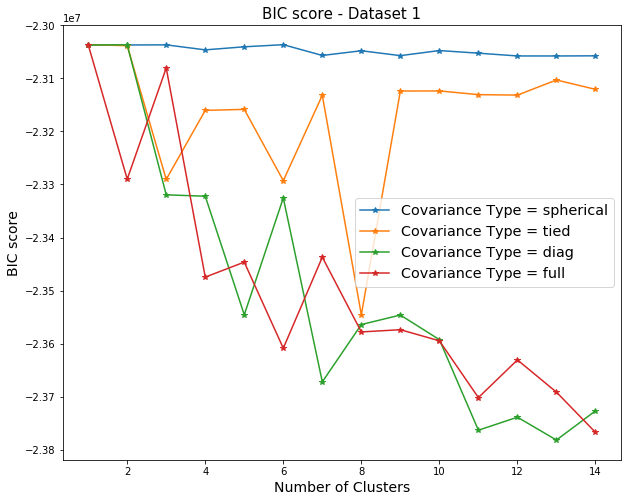

In [60]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with RP

In [62]:
# Finding the number of clusters using Silhouette scores after implementing RP
n_clusters=np.arange(2, 10)
sils1_PCA=[]
bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X1_RP)
        bic_cv.append(EM_Model.bic(X1_RP))
    bic.append(bic_cv)

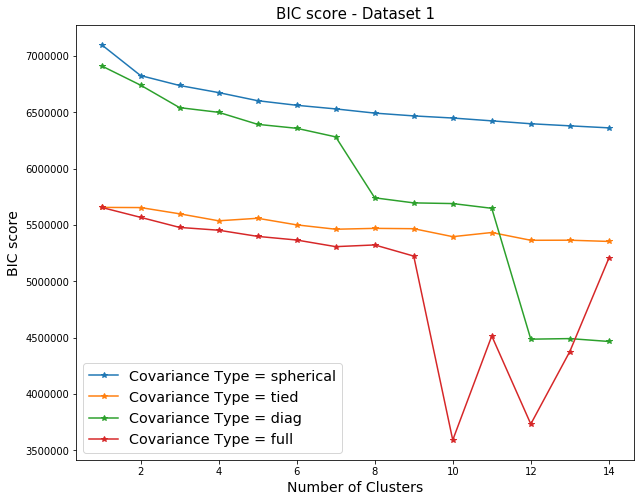

In [63]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with Feature Selection

In [68]:
# Finding the number of clusters using Silhouette scores after implementing FS
n_clusters=np.arange(2, 10)
sils1_PCA=[]
bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X1_FS)
        bic_cv.append(EM_Model.bic(X1_FS))
    bic.append(bic_cv)

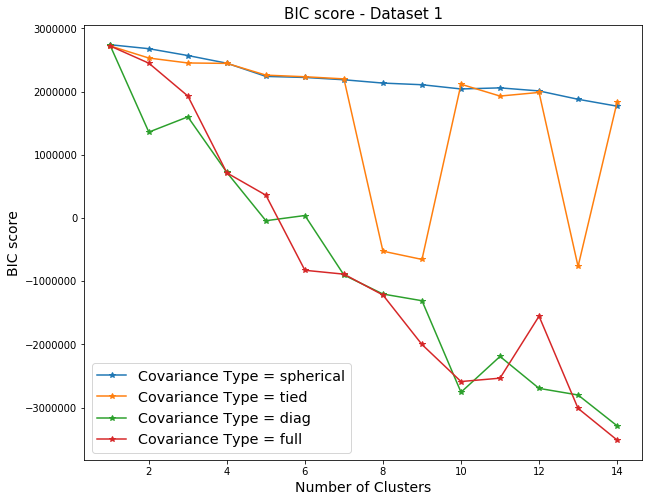

In [69]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# ICA Dataset 1

In [58]:
from sklearn.decomposition import FastICA

ica = FastICA(tol = 1e-2, max_iter = 1000, n_components = 10)
X1_ica = ica.fit_transform(X_sc)

In [173]:
sse_ica = []
for i in range (1,18):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X1_ica)
    sse_ica.append(kmeans.inertia_)

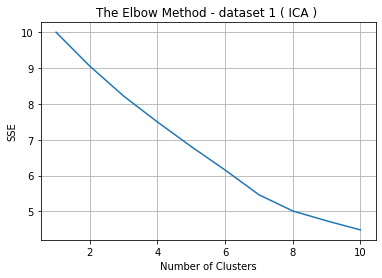

In [172]:
plt.plot(range(1,18),sse_ica)
plt.title("The Elbow Method - dataset 1 ( ICA ) ")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Randomized Projection Dataset 1

In [61]:
from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection(eps = 0.1, n_components = 9)
X1_RP = srp.fit_transform(X_sc)

In [32]:
sse_ra_1 = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X1_RP)
    sse_ra_1.append(kmeans.inertia_)

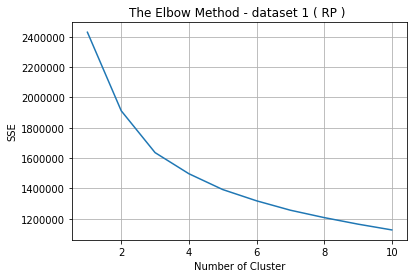

In [34]:
plt.plot(range(1,11),sse_ra_1)
plt.title("The Elbow Method - dataset 1 ( RP ) ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

# Feature Selection Dataset 1

In [64]:
# Using RFE to do the feature selection by Random Forest
from sklearn.feature_selection import RFECV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [65]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=6)
rfecv = RFECV(estimator=dt, step=1, cv=5, n_jobs=-1,
              scoring='accuracy')
rfecv.fit(X_sc, Y1)

RFECV(cv=5,
      estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                       max_depth=6, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=-1, scoring='accuracy', step=1,
      verbose=0)

In [66]:
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.ranking_)

Optimal number of features : 4
[ 1  6  1  1  4 10  9  1  7  3  8  2  5]


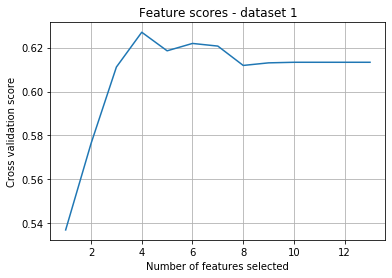

In [51]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.grid()
plt.title("Feature scores - dataset 1")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [67]:
X1_FS = X_sc[:,(0,2,3,7)]

In [53]:
sse1_FS = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X1_FS)
    sse1_FS.append(kmeans.inertia_)

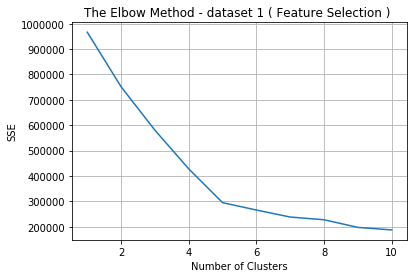

In [170]:
plt.plot(range(1,11), sse1_FS)
plt.title("The Elbow Method - dataset 1 ( Feature Selection ) ")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# ANN Dataset 1 

In [36]:
X_train_1 ,X_test_1, y_train_1 , y_test_1 = train_test_split(X_sc, Y1, test_size = 0.3 , random_state = 29)

In [37]:
# Building the final classifier
ANN = MLPClassifier(hidden_layer_sizes= (20,20,20),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          alpha = 0.0006,
                          random_state= 0)

ANN.fit(X_train_1, y_train_1)

MLPClassifier(activation='relu', alpha=0.0006, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
### predicting the test set result
y_pred_1 = ANN.predict(X_test_1)
y_expect_1 = y_test_1

### Finding the accuracy
Result_1 = accuracy_score(y_expect_1, y_pred_1)
print(Result_1)

### create confusion matrix
cm_1 = confusion_matrix(y_test_1 , y_pred_1)
print(cm_1)

0.7831539735099338
[[29911  6345]
 [ 9372 26852]]


# ANN with PCA

In [183]:
X_train_1 ,X_test_1, y_train_1 , y_test_1 = train_test_split(X1_PCA, Y1, test_size = 0.3 , random_state = 0)

In [189]:
ANN_class_1 = MLPClassifier(hidden_layer_sizes= (30,30,30,30),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

In [190]:
ANN_class_1.fit(X_train_1, y_train_1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [191]:
### predicting the test set result
y_pred_1 = ANN_class_1.predict(X_test_1)
y_expect_1 = y_test_1

In [192]:
### Finding the accuracy
Result_1 = accuracy_score(y_expect_1, y_pred_1)
print(Result_1)

0.7818432671081678


In [188]:
### create confusion matrix
cm_1 = confusion_matrix(y_test_1, y_pred_1)
print(cm_1)

[[29633  6798]
 [ 9979 26070]]


# ANN with Randomized Projections

In [193]:
X_train_1 ,X_test_1, y_train_1, y_test_1 = train_test_split(X1_RP, Y1, test_size = 0.30 , random_state = 0)

In [194]:
ANN_class_1 = MLPClassifier(hidden_layer_sizes= (30,30,30,30),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0)

In [195]:
ANN_class_1.fit(X_train_1, y_train_1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [196]:
### predicting the test set result
y_pred_1 = ANN_class_1.predict(X_test_1)
y_expect_1 = y_test_1

In [197]:
### Finding the accuracy
Result_1 = accuracy_score(y_expect_1 , y_pred_1)
print(Result_1)

0.7522764900662252


In [198]:
### create confusion matrix
cm_1 = confusion_matrix(y_test_1 , y_pred_1)
print(cm_1)

[[26968  9463]
 [ 8492 27557]]


# ANN with feature selection

In [199]:
X_train_1 ,X_test_1, y_train_1 , y_test_1 = train_test_split(X1_FS,Y1, test_size = 0.3, random_state = 0)

In [200]:
ANN_class_1 = MLPClassifier(hidden_layer_sizes= (30,30,30,30),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0)

In [201]:
ANN_class_1.fit(X_train_1, y_train_1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [64]:
### predicting the test set result
y_pred_1 = ANN_class_1.predict(X_test_1)
y_expect_1 = y_test_1

In [65]:
### Finding the accuracy
Result_1 = accuracy_score(y_expect_1 , y_pred_1)
print(Result_1)

0.7298979028697572


In [66]:
### create confusion matrix
cm_1 = confusion_matrix(y_test_1, y_pred_1)
print(cm_1)

[[27582  8849]
 [10728 25321]]


# ANN with ICA Dataset 1

In [202]:
X_train_1 ,X_test_1, y_train_1 , y_test_1 = train_test_split(X1_ica, Y1, test_size = 0.3 , random_state = 0)

In [217]:
ANN_class_1 = MLPClassifier(hidden_layer_sizes= (100,50,50,50),
                          activation='relu',  
                          batch_size='auto',
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0)

In [218]:
ANN_class_1.fit(X_train_1, y_train_1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [219]:
### predicting the test set result
y_pred_1 = ANN_class_1.predict(X_test_1)
y_expect_1 = y_test_1

In [220]:
### Finding the accuracy
Result_1 = accuracy_score(y_expect_1, y_pred_1)
print(Result_1)

0.7634243929359823


In [72]:
### create confusion matrix
cm_1 = confusion_matrix(y_test_1, y_pred_1)
print(cm_1)

[[27006  9425]
 [ 7722 28327]]


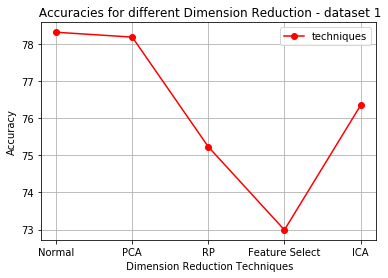

In [221]:
accur_1 = [78.315 , 78.184, 75.227 , 72.989 , 76.342]
accur_type = ['Normal','PCA','RP','Feature Select','ICA']
plt.plot(accur_type , accur_1 , marker='o',markersize=6,color='red',label='techniques')
plt.title(" Accuracies for different Dimension Reduction - dataset 1")
plt.xlabel(" Dimension Reduction Techniques")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ANN with cluster labels

In [79]:
### ANN with dataset 1 : 
X_train_1 , X_test_1, y_train_1 , y_test_1 = train_test_split(y_kmeans_1, Y1, test_size = 0.3, random_state = 0)

In [80]:
ANN_class_1 = MLPClassifier(hidden_layer_sizes= (100,50,50,50),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

In [81]:
ANN_class_1.fit(X_train_1.reshape(-1,1), y_train_1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [82]:
### predicting the test set result
y_pred_1 = ANN_class_1.predict(X_test_1.reshape(-1,1))
y_expect_1 = y_test_1

In [83]:
### Finding the accuracy
Result_1 = accuracy_score(y_expect_1,y_pred_1)
print(Result_1)

0.5806291390728476


In [84]:
### create confusion matrix
cm_1 = confusion_matrix(y_test_1, y_pred_1)
print(cm_1)

[[11862 24569]
 [ 5827 30222]]


# K Means Algorithm Dataset 2

In [100]:
# Using elblow method to find optimal number of clusters
from sklearn.cluster import KMeans
sse = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

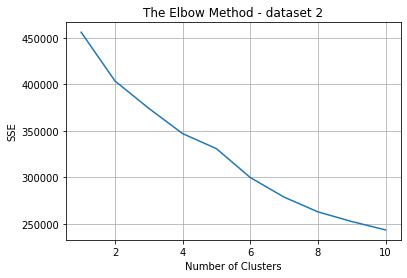

In [101]:
plt.plot(range(1,11),sse)
plt.grid()
plt.title("The Elbow Method - dataset 2")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [102]:
# Applying k-means to dataset 2
kmeans = KMeans(n_clusters= 8, 
                init = "k-means++" , 
                max_iter= 500 , 
                n_init= 10 , 
                random_state= 0)

y_kmeans_2 = kmeans.fit_predict(X)

# PCA Dataset 2

In [42]:
# Implementing PCA for Energy dataset to find maximum variance 
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
X2_PCA = pca.fit_transform(X)
var_ex = pca.explained_variance_ratio_

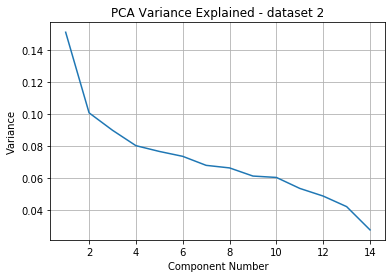

In [107]:
plt.plot(range(1,15),var_ex)
plt.title("PCA Variance Explained - dataset 2")
plt.xlabel("Component Number")
plt.ylabel("Variance")
plt.grid()
plt.show()

In [108]:
pca_2 = PCA(n_components = 10)
X2_final_PCA = pca_2.fit_transform(X)

In [109]:
### Finding the number of clusters 
sse_pca = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X2_final_PCA)
    sse_pca.append(kmeans.inertia_)

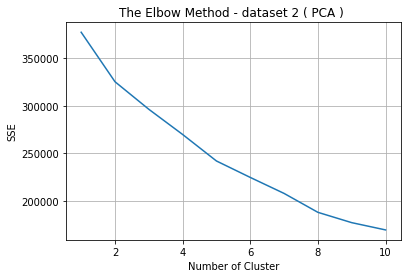

In [110]:
plt.plot(range(1,11), sse_pca)
plt.title("The Elbow Method - dataset 2 ( PCA ) ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [111]:
# Applying k-means to dataset 2
kmeans_final_pca = KMeans(n_clusters= 5, 
                init = "k-means++" , 
                max_iter= 500 , 
                n_init= 10 , 
                random_state= 0)

y_kmeans_2 = kmeans_final_pca.fit_predict(X2_final_PCA)

# Expectation Maximization

In [40]:
from sklearn.mixture import GaussianMixture as GMM

bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X)
        bic_cv.append(EM_Model.bic(X))
    bic.append(bic_cv)

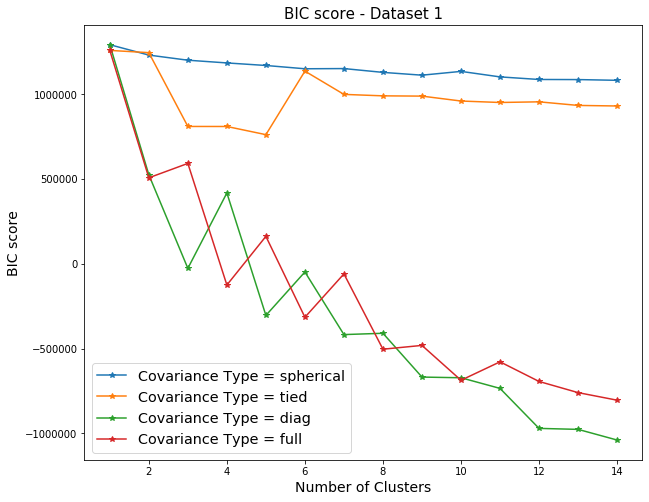

In [41]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with PCA

In [43]:
from sklearn.mixture import GaussianMixture as GMM

bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X2_PCA)
        bic_cv.append(EM_Model.bic(X2_PCA))
    bic.append(bic_cv)

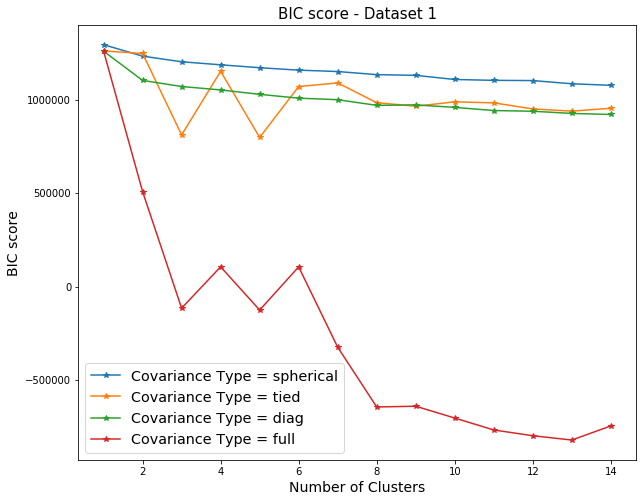

In [44]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with ICA

In [46]:
from sklearn.mixture import GaussianMixture as GMM

bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X2_ica)
        bic_cv.append(EM_Model.bic(X2_ica))
    bic.append(bic_cv)

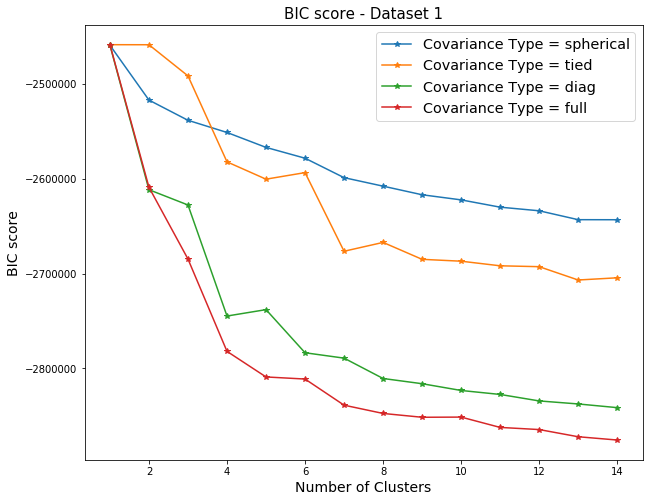

In [47]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with RP

In [49]:
from sklearn.mixture import GaussianMixture as GMM

bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X2_RP)
        bic_cv.append(EM_Model.bic(X2_RP))
    bic.append(bic_cv)

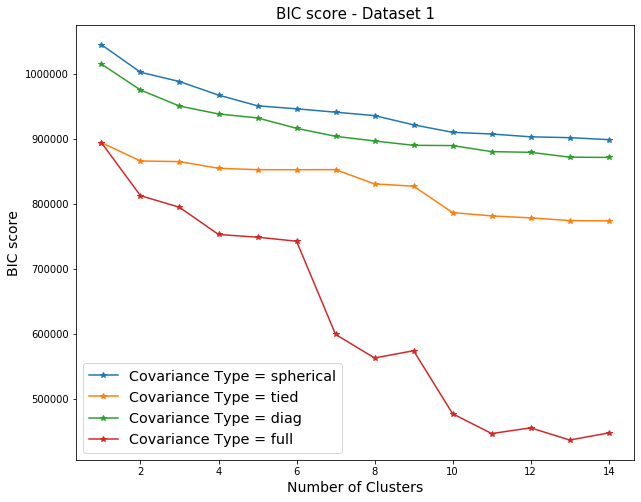

In [50]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# Expectation Maximization with FS

In [56]:
from sklearn.mixture import GaussianMixture as GMM

bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components = np.arange(1,15,1)
for i in cv_types:
    bic_cv = []
    for n in n_components:
        EM_Model = GaussianMixture(n_components=n, covariance_type=i, n_init=1)
        EM_Model.fit(X2_FS)
        bic_cv.append(EM_Model.bic(X2_FS))
    bic.append(bic_cv)

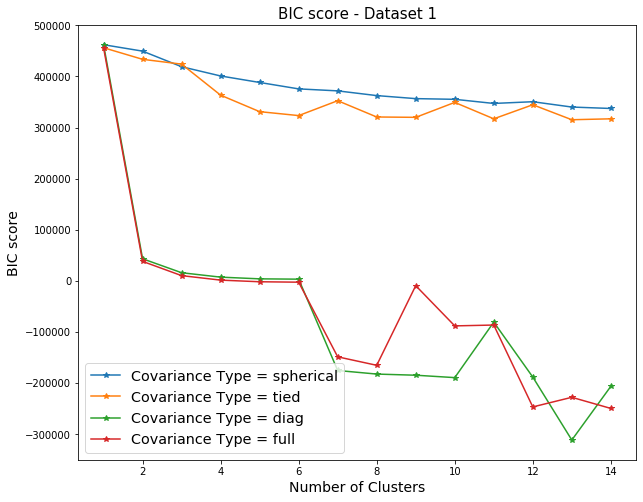

In [57]:
plt.figure(figsize=(10,8))

for i in range(0,len(cv_types)):
    plt.plot(n_components, bic[i], marker='*', label="Covariance Type = {}".format(cv_types[i]))
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('BIC score', fontsize=14)
    plt.title('BIC score - Dataset 1', fontsize=15)

# ICA Dataset 2

In [45]:
from sklearn.decomposition import FastICA

ica = FastICA(tol = 1e-2, max_iter = 1000, n_components = 10)
X2_ica = ica.fit_transform(X)

In [115]:
sse_ica = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X2_ica)
    sse_ica.append(kmeans.inertia_)

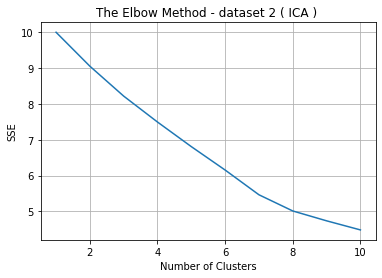

In [116]:
plt.plot(range(1,11),sse_ica)
plt.title("The Elbow Method - dataset 2 ( ICA ) ")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Randomized Projection Dataset 2

In [48]:
from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection(eps = 0.1, n_components = 9)
X2_RP = srp.fit_transform(X)

In [118]:
sse_ra_2 = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X2_RP)
    sse_ra_2.append(kmeans.inertia_)

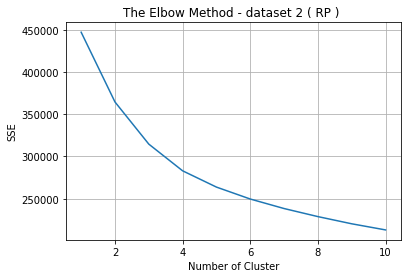

In [119]:
plt.plot(range(1,11),sse_ra_2)
plt.title("The Elbow Method - dataset 2 ( RP ) ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

# Feature Selection Dataset 2

In [51]:
# Using RFE to do the feature selection by Random Forest
from sklearn.feature_selection import RFECV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [52]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=6)
rfecv = RFECV(estimator=dt, step=1, cv=5, n_jobs=-1,
              scoring='accuracy')
rfecv.fit(X, Y_adt)

RFECV(cv=5,
      estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                       max_depth=6, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=-1, scoring='accuracy', step=1,
      verbose=0)

In [53]:
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.ranking_)

Optimal number of features : 5
[ 1  3  1  1  2  1  5 10  9  4  1  8  7  6]


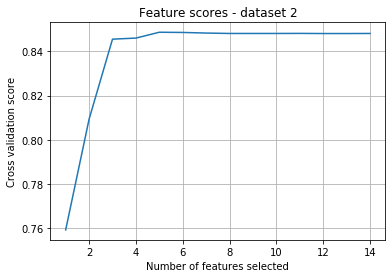

In [54]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.grid()
plt.title("Feature scores - dataset 2")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [55]:
X2_FS = X[:,(0,2,3,5,10)]

In [126]:
sse2_FS = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X2_FS)
    sse2_FS.append(kmeans.inertia_)

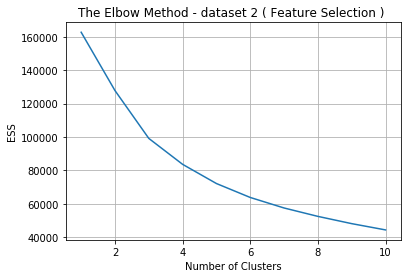

In [127]:
plt.plot(range(1,11), sse2_FS)
plt.title("The Elbow Method - dataset 2 ( Feature Selection ) ")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("ESS")
plt.show()

# ANN Dataset 2

In [128]:
X_train_2 ,X_test_2, y_train_2 , y_test_2 = train_test_split(X, Y_adt, test_size = 0.3 , random_state = 29)

In [129]:
# Building the final classifier
ANN = MLPClassifier(hidden_layer_sizes= (20,20,20), 
                    activation='relu', 
                    alpha=0.0002, 
                    batch_size='auto', 
                    solver= 'adam', 
                    learning_rate= 'constant', 
                    max_iter = 600, 
                    random_state=29)

ANN.fit(X_train_2, y_train_2)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=29, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [130]:
### predicting the test set result
y_pred_2 = ANN.predict(X_test_2)
y_expect_2 = y_test_2

### Finding the accuracy
Result_2 = accuracy_score(y_expect_2, y_pred_2)
print(Result_2)

### create confusion matrix
cm_2 = confusion_matrix(y_test_2 , y_pred_2)
print(cm_2)

0.8402088238304842
[[6713  688]
 [ 873 1495]]


# ANN with PCA

In [132]:
X_train_2 ,X_test_2, y_train_2 , y_test_2 = train_test_split(X2_PCA, Y_adt, test_size = 0.3 , random_state = 0)

In [134]:
ANN_class_2 = MLPClassifier(hidden_layer_sizes= (20,20,20), 
                    activation='relu', 
                    alpha=0.0002, 
                    batch_size='auto', 
                    solver= 'adam', 
                    learning_rate= 'constant', 
                    max_iter = 600, 
                    random_state=29)

In [135]:
ANN_class_2.fit(X_train_2, y_train_2)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=29, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [136]:
### predicting the test set result
y_pred_2 = ANN_class_2.predict(X_test_2)
y_expect_2 = y_test_2

In [137]:
### Finding the accuracy
Result_2 = accuracy_score(y_expect_2, y_pred_2)
print(Result_2)

0.8452246903470161


In [138]:
### create confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)

[[6778  629]
 [ 883 1479]]


# ANN with RP

In [139]:
X_train_2 ,X_test_2, y_train_2, y_test_2 = train_test_split(X2_RP, Y_adt, test_size = 0.30 , random_state = 0)

In [140]:
ANN_class_2 = MLPClassifier(hidden_layer_sizes= (20,20,20), 
                    activation='relu', 
                    alpha=0.0002, 
                    batch_size='auto', 
                    solver= 'adam', 
                    learning_rate= 'constant', 
                    max_iter = 600, 
                    random_state=29)

In [141]:
ANN_class_2.fit(X_train_2, y_train_2)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=29, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [142]:
### predicting the test set result
y_pred_2 = ANN_class_2.predict(X_test_2)
y_expect_2 = y_test_2

In [143]:
### Finding the accuracy
Result_2 = accuracy_score(y_expect_2 , y_pred_2)
print(Result_2)

0.8337598525949432


In [144]:
### create confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)

[[6763  644]
 [ 980 1382]]


# ANN with Feature Selection

In [146]:
X_train_2 ,X_test_2, y_train_2 , y_test_2 = train_test_split(X2_FS,Y_adt, test_size = 0.3, random_state = 0)

In [147]:
ANN_class_2 = MLPClassifier(hidden_layer_sizes= (20,20,20), 
                    activation='relu', 
                    alpha=0.0002, 
                    batch_size='auto', 
                    solver= 'adam', 
                    learning_rate= 'constant', 
                    max_iter = 600, 
                    random_state=29)

In [148]:
ANN_class_2.fit(X_train_2, y_train_2)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=29, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [149]:
### predicting the test set result
y_pred_2 = ANN_class_2.predict(X_test_2)
y_expect_2 = y_test_2

In [150]:
### Finding the accuracy
Result_2 = accuracy_score(y_expect_2 , y_pred_2)
print(Result_2)

0.8445081379875116


In [151]:
### create confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)

[[6747  660]
 [ 859 1503]]


# ANN with ICA

In [152]:
X_train_2 ,X_test_2, y_train_2, y_test_2 = train_test_split(X2_ica, Y_adt, test_size = 0.3 , random_state = 0)

In [153]:
ANN_class_2 = MLPClassifier(hidden_layer_sizes= (20,20,20), 
                    activation='relu', 
                    alpha=0.0002, 
                    batch_size='auto', 
                    solver= 'adam', 
                    learning_rate= 'constant', 
                    max_iter = 600, 
                    random_state=29)

In [154]:
ANN_class_2.fit(X_train_2, y_train_2)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=29, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [155]:
### predicting the test set result
y_pred_2 = ANN_class_2.predict(X_test_2)
y_expect_2 = y_test_2

In [156]:
### Finding the accuracy
Result_2 = accuracy_score(y_expect_2, y_pred_2)
print(Result_2)

0.8240352134302386


In [157]:
### create confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)

[[6944  463]
 [1256 1106]]


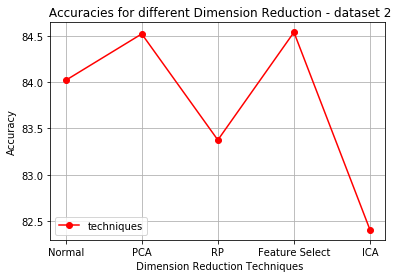

In [158]:
accur_2 = [84.020, 84.522, 83.375, 84.540, 82.403]
accur_type = ['Normal','PCA','RP','Feature Select','ICA']
plt.plot(accur_type , accur_2 , marker='o',markersize=6,color='red',label='techniques')
plt.title(" Accuracies for different Dimension Reduction - dataset 2")
plt.xlabel(" Dimension Reduction Techniques")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ANN with Cluster Labels

In [160]:
### ANN with dataset 2 : 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(y_kmeans_2, Y_adt, test_size = 0.3, random_state = 0)

In [161]:
ANN_class_2 = MLPClassifier(hidden_layer_sizes= (20,20,20), 
                    activation='relu', 
                    alpha=0.0002, 
                    batch_size='auto', 
                    solver= 'adam', 
                    learning_rate= 'constant', 
                    max_iter = 600, 
                    random_state=29)

In [162]:
ANN_class_2.fit(X_train_2.reshape(-1,1), y_train_2)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=29, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [163]:
### predicting the test set result
y_pred_2 = ANN_class_2.predict(X_test_2.reshape(-1,1))
y_expect_2 = y_test_2

In [164]:
### Finding the accuracy
Result_2 = accuracy_score(y_expect_2,y_pred_2)
print(Result_2)

0.7654826491964377


In [165]:
### create confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)

[[7200  207]
 [2084  278]]
